In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


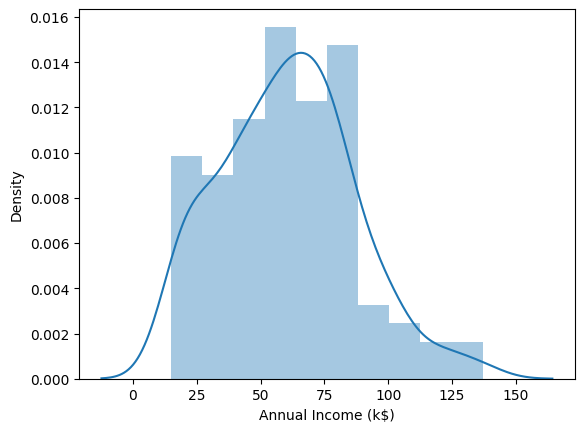

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

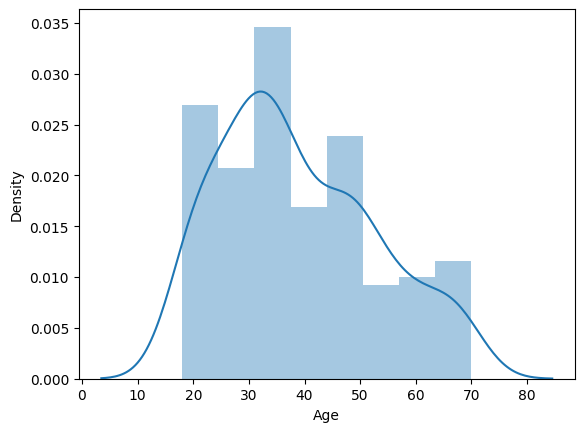

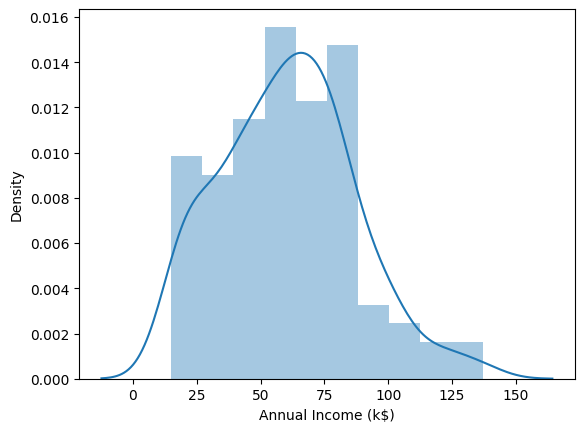

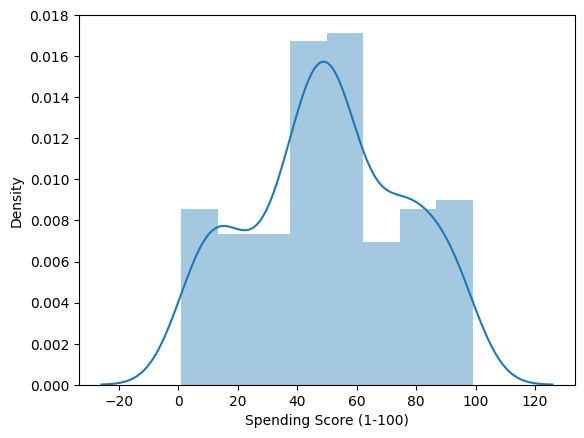

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

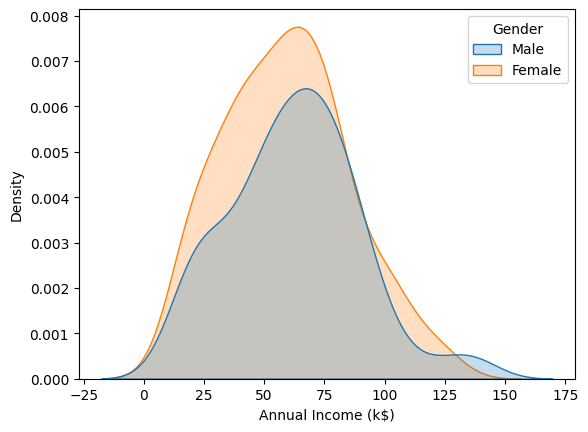

In [9]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')

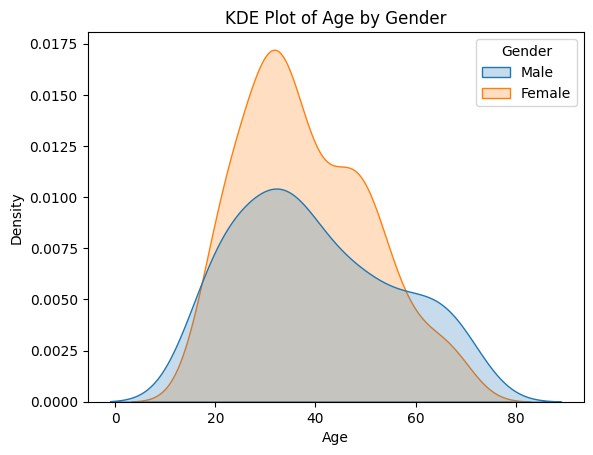

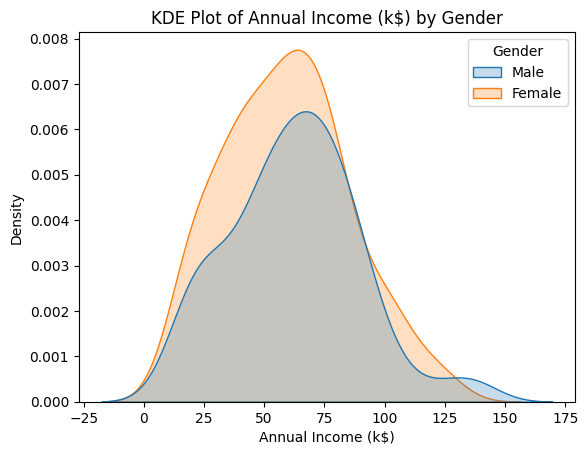

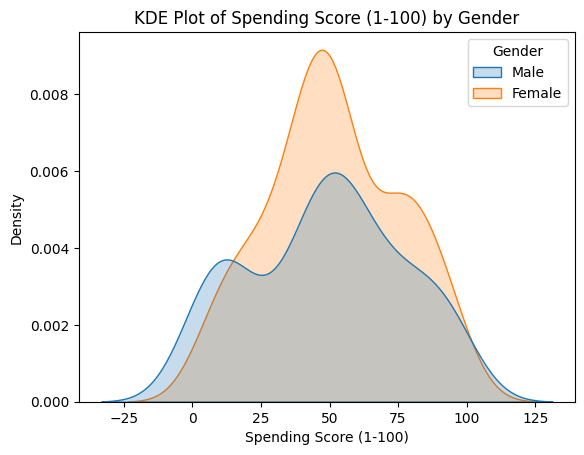

In [11]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')
    plt.title(f'KDE Plot of {i} by Gender')
    plt.show()

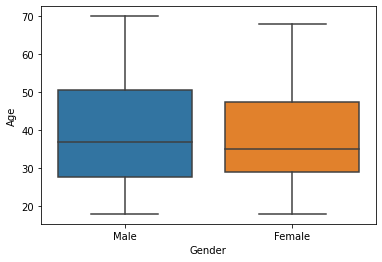

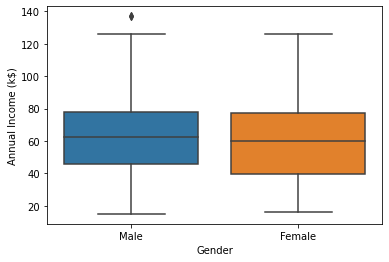

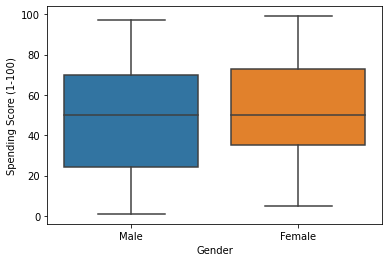

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [12]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

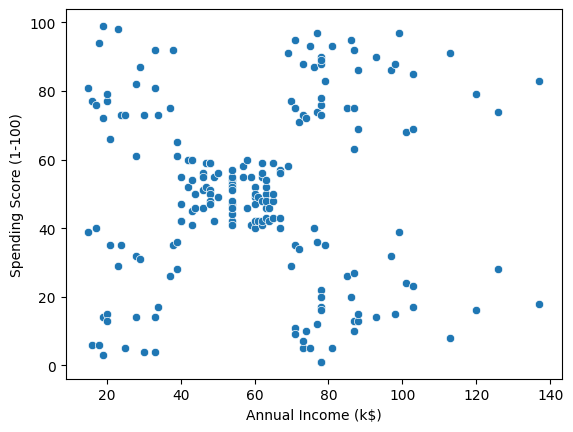

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

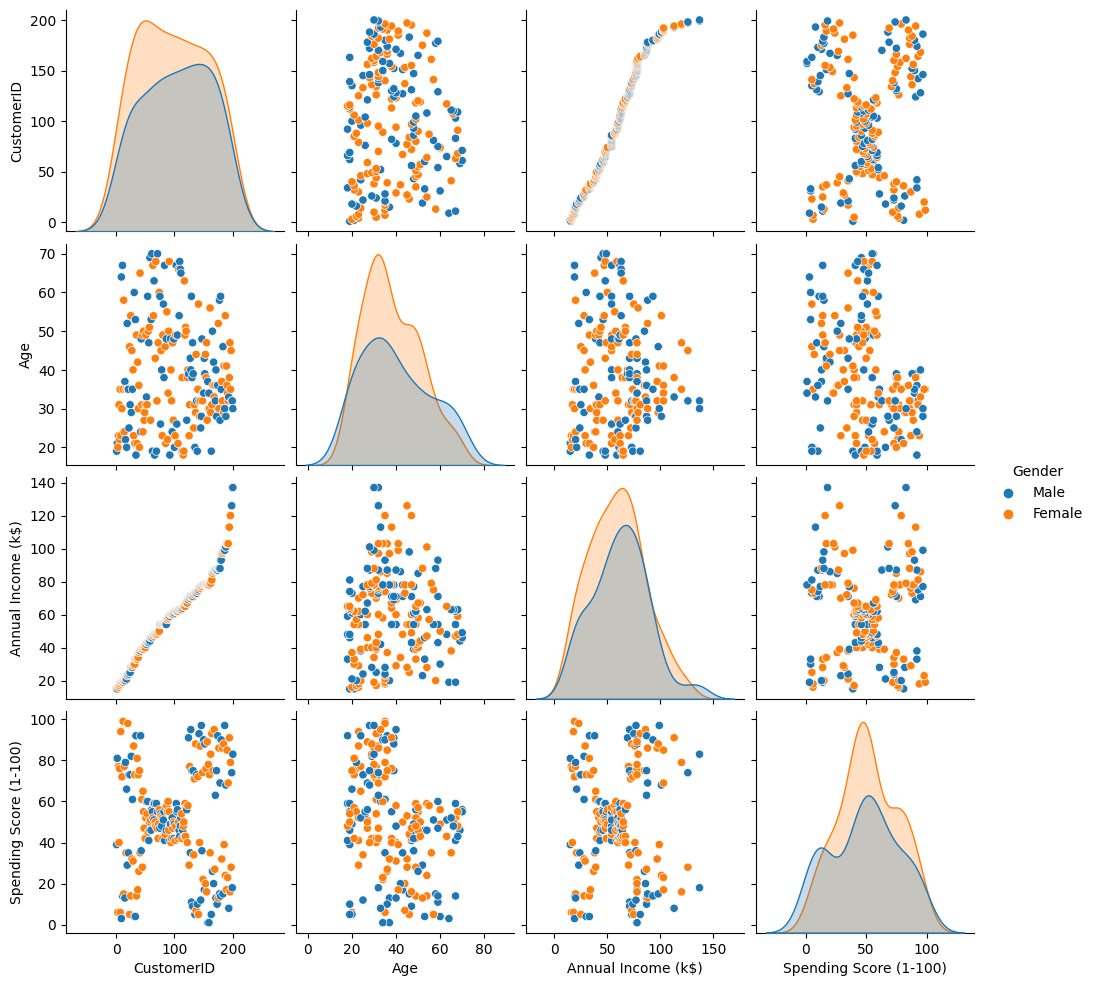

In [14]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [16]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [20]:

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Calculate the correlation matrix
correlation_matrix = df.corr()


<Axes: >

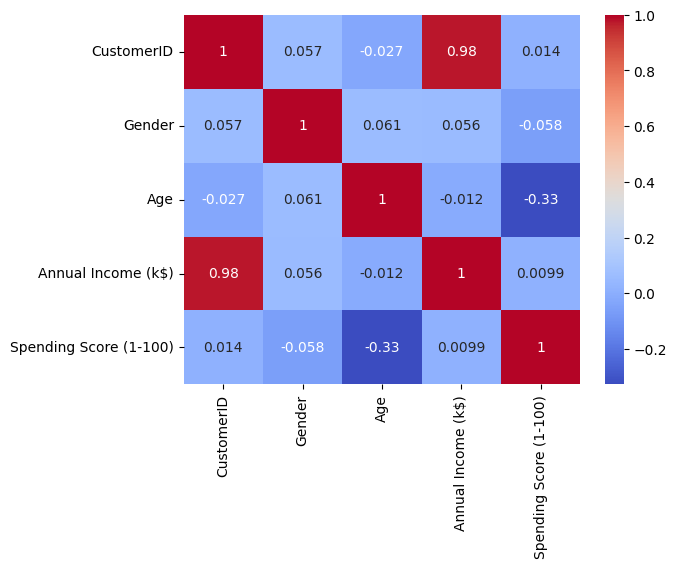

In [21]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [22]:
clustering1 = KMeans(n_clusters=3)

In [23]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [24]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [25]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [26]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
0    74
1    36
Name: count, dtype: int64

In [27]:
clustering1.inertia_

23517.330930930926

In [28]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [29]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5081.484660267269,
 3949.2756132756135,
 2827.308424908425,
 2221.1150793650795,
 1761.138888888889]

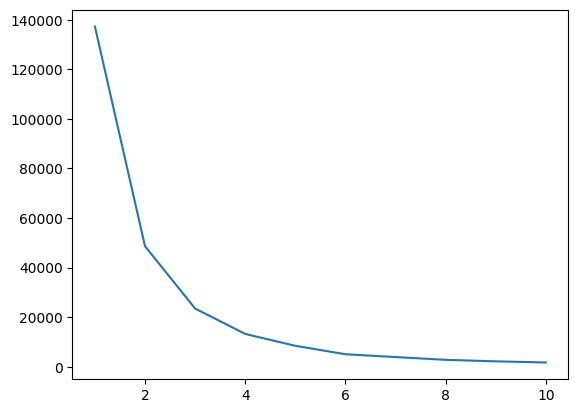

In [30]:
plt.plot(range(1,11),intertia_scores)

In [31]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [34]:
mean_values = df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(mean_values)

                      Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               39.500000           33.486486               50.229730
1               37.833333           99.888889               50.638889
2               38.722222           67.088889               50.000000


In [35]:
#Bivariate Clustering

In [36]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,3
1,2,1,21,15,81,0,2
2,3,0,20,16,6,0,3
3,4,0,23,16,77,0,2
4,5,0,31,17,40,0,3


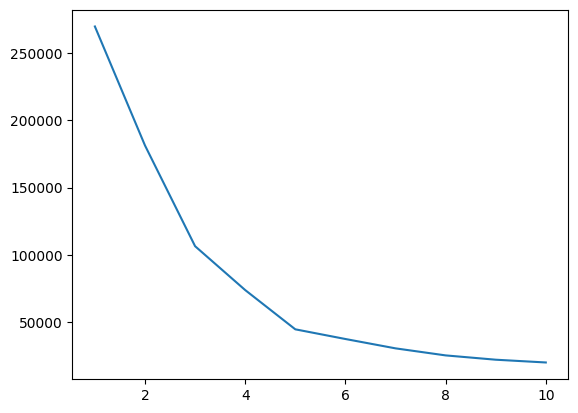

In [37]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [38]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

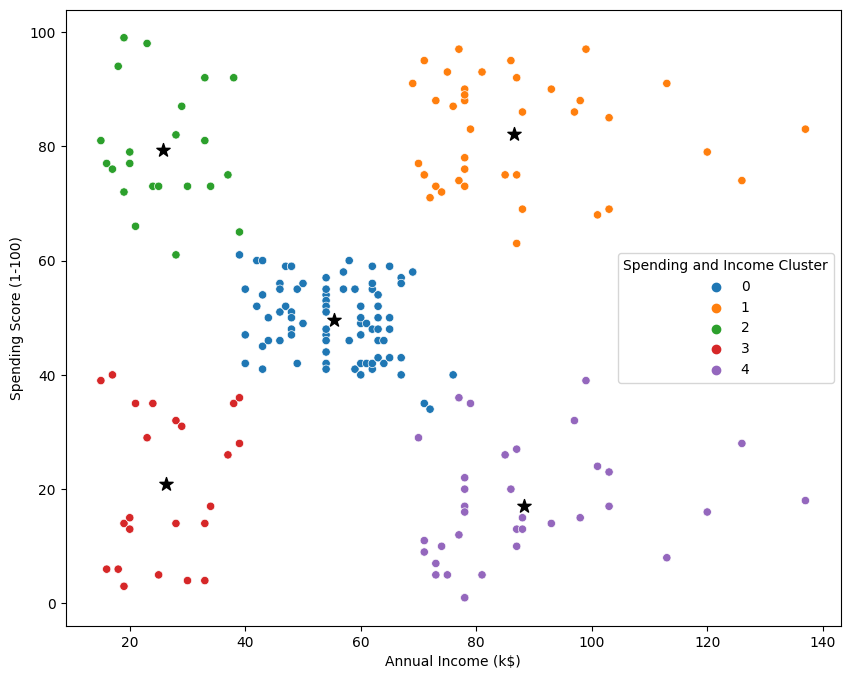

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [40]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,0,1
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.608696,0.391304
4,0.457143,0.542857


In [42]:
# Calculate the mean for the specified columns, grouped by 'Spending and Income Cluster'
mean_values = df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the result
print(mean_values)

                                   Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            42.716049           55.296296   
1                            32.692308           86.538462   
2                            25.272727           25.727273   
3                            45.217391           26.304348   
4                            41.114286           88.200000   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         49.518519  
1                                         82.128205  
2                                         79.363636  
3                                         20.913043  
4                                         17.114286  


In [43]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [44]:
scale = StandardScaler()

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,3
1,2,1,21,15,81,0,2
2,3,0,20,16,6,0,3
3,4,0,23,16,77,0,2
4,5,0,31,17,40,0,3


In [46]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,3
1,2,1,21,15,81,0,2
2,3,0,20,16,6,0,3
3,4,0,23,16,77,0,2
4,5,0,31,17,40,0,3


In [47]:
dff.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [50]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [51]:
dff = scale.fit_transform(dff)

In [52]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


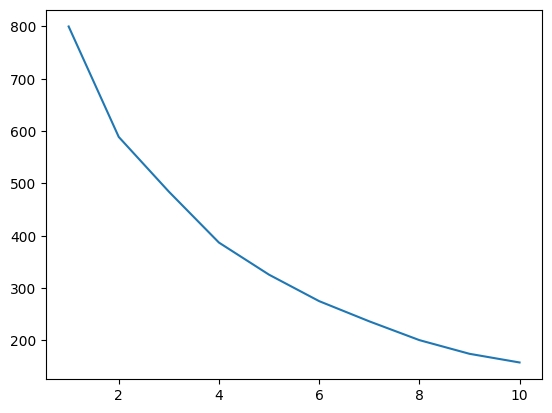

In [53]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [54]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,3
1,2,1,21,15,81,0,2
2,3,0,20,16,6,0,3
3,4,0,23,16,77,0,2
4,5,0,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,0,35,120,79,1,1
196,197,0,45,126,28,1,4
197,198,1,32,126,74,1,1
198,199,1,32,137,18,1,4


In [55]:
df.to_csv('Clustering.csv')

In [57]:
# Group by income clusters and calculate summary statistics
income_cluster_summary = df.groupby('Income Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Annual Income (k$)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std']
})
print("Income Cluster Summary:")
print(income_cluster_summary)

Income Cluster Summary:
                      Age                   Annual Income (k$)         \
                     mean median        std               mean median   
Income Cluster                                                          
0               39.500000   35.0  16.008773          33.486486   34.0   
1               37.833333   36.0   8.530617          99.888889   97.5   
2               38.722222   38.0  14.024880          67.088889   67.0   

                          Spending Score (1-100)                    
                      std                   mean median        std  
Income Cluster                                                      
0               11.283693              50.229730   51.0  24.981937  
1               14.950925              50.638889   51.0  32.492771  
2                8.479512              50.000000   49.0  23.745372  


In [58]:
# Group by spending and income clusters and calculate summary statistics
spending_income_cluster_summary = df.groupby('Spending and Income Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Annual Income (k$)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std']
})
print("Spending and Income Cluster Summary:")
print(spending_income_cluster_summary)

Spending and Income Cluster Summary:
                                   Age                   Annual Income (k$)  \
                                  mean median        std               mean   
Spending and Income Cluster                                                   
0                            42.716049   46.0  16.447822          55.296296   
1                            32.692308   32.0   3.728650          86.538462   
2                            25.272727   23.5   5.257030          25.727273   
3                            45.217391   46.0  13.228607          26.304348   
4                            41.114286   42.0  11.341676          88.200000   

                                              Spending Score (1-100)         \
                            median        std                   mean median   
Spending and Income Cluster                                                   
0                             54.0   8.988109              49.518519   50.0   
1             

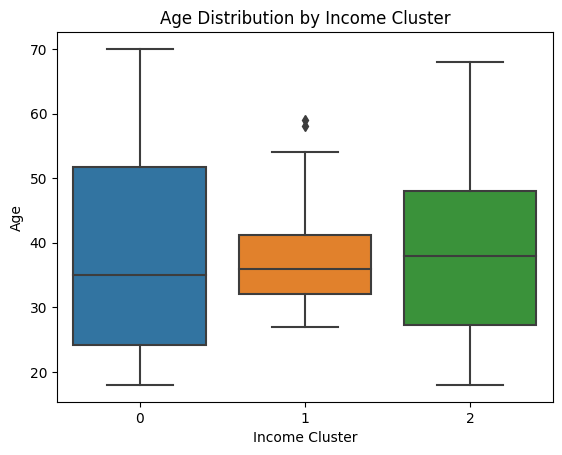

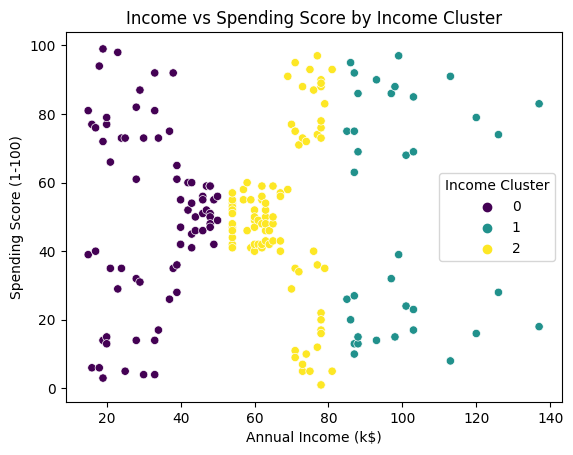

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualize Age by Income Cluster
sns.boxplot(x='Income Cluster', y='Age', data=df)
plt.title('Age Distribution by Income Cluster')
plt.show()

# Example: Income vs Spending Score colored by Income Cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income Cluster', data=df, palette='viridis')
plt.title('Income vs Spending Score by Income Cluster')
plt.show()



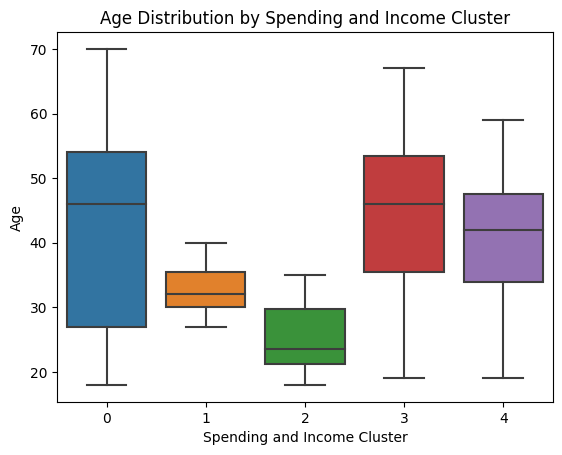

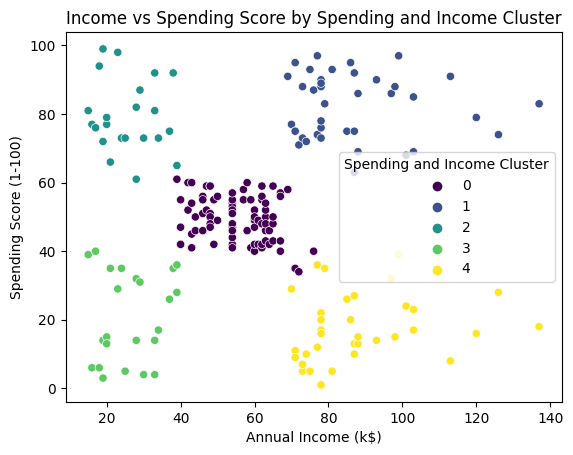

In [60]:
# Example: Visualize Age by Spending and Income Cluster
sns.boxplot(x='Spending and Income Cluster', y='Age', data=df)
plt.title('Age Distribution by Spending and Income Cluster')
plt.show()

# Example: Income vs Spending Score colored by Spending and Income Cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', data=df, palette='viridis')
plt.title('Income vs Spending Score by Spending and Income Cluster')
plt.show()


In [63]:
#Income Clusters:

#Cluster 1: High-income individuals with high spending.
#Cluster 2: Middle-income individuals with moderate spending.
#Cluster 3: Low-income individuals with low spending.
#Spending and Income Clusters:

#Cluster A: High spenders with high income.
#Cluster B: Moderate spenders with moderate income.
#Cluster C: Low spenders with low income.

In [62]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for income clusters
silhouette_income = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], df['Income Cluster'])
print(f"Silhouette Score for Income Clusters: {silhouette_income}")

# Calculate silhouette score for spending and income clusters
silhouette_spending_income = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], df['Spending and Income Cluster'])
print(f"Silhouette Score for Spending and Income Clusters: {silhouette_spending_income}")


Silhouette Score for Income Clusters: 0.18740974396347995
Silhouette Score for Spending and Income Clusters: 0.445342943973765
